In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
import parser as parser
from datetime import datetime, date, time, timedelta
import datetime as dt 
from datetime import datetime
import plotly.graph_objects as go
import math
import scipy.stats as stats
import squarify
import plotly.tools as tls
import cufflinks as cf
import pandas.util.testing as tm

C:\Users\jsolisbe\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
f = lambda s: datetime.datetime.strptime(s,'%d-%m-%Y-%H-%M-%S')

In [3]:
data = pd.read_excel("Fichero_Abandonados.xlsx", date_parser = f,encoding='utf-8-sig')
data.head()

,ID_Cliente_EVO,Producto,Estado,F_creacion,Numero_caso,Fecha_Hora_Apertura,Hora_Apertura,Ultimo_punto_abandono,Hora,Minuto,Horas_por_15,Churn
0,IDE-02663452,Cuenta Inteligente,Activo,2019-06-05,974222,2019-06-05,11:00:00,casi-lo-tenemos,11,0,11:00:00,0
1,IDE-02663332,Cuenta Inteligente,Pendiente revisión Captación,2019-06-05,973414,2019-06-05,09:00:00,metodo-validacion,9,0,09:00:00,0
2,IDE-02648448,Cuenta Inteligente,Potencial,2019-05-20,973415,2019-06-05,09:00:00,datos-personal,9,0,09:00:00,0
3,IDE-02663250,Cuenta Inteligente,Desestimado por Electronica ID,2019-06-05,973143,2019-06-05,04:00:00,contratacion-ci,4,0,04:00:00,0
4,IDE-02663230,Cuenta Inteligente,Activo,2019-06-05,973105,2019-06-05,02:00:00,contratacion-ci,2,0,02:00:00,0


In [4]:
data.shape
print("The number of null values is: " , data.isnull().values.sum())
print(data.isnull().sum())

The number of null values is:  0
ID_Cliente_EVO           0
Producto                 0
Estado                   0
F_creacion               0
Numero_caso              0
Fecha_Hora_Apertura      0
Hora_Apertura            0
Ultimo_punto_abandono    0
Hora                     0
Minuto                   0
Horas_por_15             0
Churn                    0
dtype: int64


In [5]:
data.describe(include="all")

,ID_Cliente_EVO,Producto,Estado,F_creacion,Numero_caso,Fecha_Hora_Apertura,Hora_Apertura,Ultimo_punto_abandono,Hora,Minuto,Horas_por_15,Churn
count,44809,44809,44809,44809,44809.000000,44809,44809,44809,44809.000000,44809.000000,44809,44809.000000
unique,44809,1,11,518,NaN,504,1438,17,NaN,NaN,96,NaN
top,IDE-02635341,Cuenta Inteligente,Activo,2018-08-03 00:00:00,NaN,2019-06-03 00:00:00,22:22:00,contratacion-ci,NaN,NaN,17:00:00,NaN
freq,1,44809,21646,5283,NaN,1721,113,7834,NaN,NaN,820,NaN
first,NaN,NaN,NaN,2017-11-27 00:00:00,NaN,2017-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-06-05 00:00:00,NaN,2019-06-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,674047.363141,NaN,NaN,NaN,14.256533,22.312705,NaN,0.977750
std,NaN,NaN,NaN,NaN,325052.742323,NaN,NaN,NaN,5.716292,16.744630,NaN,0.147497
min,NaN,NaN,NaN,NaN,1765.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,447180.000000,NaN,NaN,NaN,11.000000,0.000000,NaN,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44809 entries, 0 to 44808
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_Cliente_EVO         44809 non-null  object        
 1   Producto               44809 non-null  object        
 2   Estado                 44809 non-null  object        
 3   F_creacion             44809 non-null  datetime64[ns]
 4   Numero_caso            44809 non-null  int64         
 5   Fecha_Hora_Apertura    44809 non-null  datetime64[ns]
 6   Hora_Apertura          44809 non-null  object        
 7   Ultimo_punto_abandono  44809 non-null  object        
 8   Hora                   44809 non-null  int64         
 9   Minuto                 44809 non-null  int64         
 10  Horas_por_15           44809 non-null  object        
 11  Churn                  44809 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 4.1+

In [7]:
# Cambio los valores a numéricos
pd.get_dummies(data['Estado'], prefix='Estado')

,Estado_Activo,Estado_Desestimado por Backoffice,Estado_Desestimado por Captación,Estado_Desestimado por Confirma,Estado_Desestimado por Electronica ID,Estado_Desestimado por no residente,Estado_Desestimado por obligaciones fiscales fuera de España,Estado_Pendiente de Electronica ID,Estado_Pendiente de revisión BO,Estado_Pendiente revisión Captación,Estado_Potencial
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
44804,1,0,0,0,0,0,0,0,0,0,0
44805,1,0,0,0,0,0,0,0,0,0,0
44806,1,0,0,0,0,0,0,0,0,0,0
44807,1,0,0,0,0,0,0,0,0,0,0


In [8]:
data = pd.concat([data, pd.get_dummies(data['Estado'], prefix='Estado')], axis=1)
data[['Estado', 'Estado_Activo', 'Estado_Desestimado por Backoffice', 'Estado_Desestimado por Captación',
      'Estado_Desestimado por Confirma', 'Estado_Desestimado por Electronica ID', 'Estado_Desestimado por no residente', 
      'Estado_Desestimado por obligaciones fiscales fuera de España', 'Estado_Pendiente de Electronica ID',
      'Estado_Pendiente de revisión BO', 'Estado_Pendiente revisión Captación', 'Estado_Potencial']]

,Estado,Estado_Activo,Estado_Desestimado por Backoffice,Estado_Desestimado por Captación,Estado_Desestimado por Confirma,Estado_Desestimado por Electronica ID,Estado_Desestimado por no residente,Estado_Desestimado por obligaciones fiscales fuera de España,Estado_Pendiente de Electronica ID,Estado_Pendiente de revisión BO,Estado_Pendiente revisión Captación,Estado_Potencial
0,Activo,1,0,0,0,0,0,0,0,0,0,0
1,Pendiente revisión Captación,0,0,0,0,0,0,0,0,0,1,0
2,Potencial,0,0,0,0,0,0,0,0,0,0,1
3,Desestimado por Electronica ID,0,0,0,0,1,0,0,0,0,0,0
4,Activo,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44804,Activo,1,0,0,0,0,0,0,0,0,0,0
44805,Activo,1,0,0,0,0,0,0,0,0,0,0
44806,Activo,1,0,0,0,0,0,0,0,0,0,0
44807,Activo,1,0,0,0,0,0,0,0,0,0,0


In [9]:
pd.get_dummies(data['Ultimo_punto_abandono'], prefix='Ultimo_punto_abandono')

,Ultimo_punto_abandono_casi-lo-tenemos,Ultimo_punto_abandono_cliente-existente,Ultimo_punto_abandono_confirmacion-datos,Ultimo_punto_abandono_confirmacion-otp,Ultimo_punto_abandono_confirmacion-otp-primer-paso,Ultimo_punto_abandono_contratacion-ci,Ultimo_punto_abandono_datos-contacto,Ultimo_punto_abandono_datos-laboral,Ultimo_punto_abandono_datos-personal,Ultimo_punto_abandono_identificacion-edad,Ultimo_punto_abandono_identificacion-iban,Ultimo_punto_abandono_identificacion-video,Ultimo_punto_abandono_metodo-validacion,Ultimo_punto_abandono_previa-firma,Ultimo_punto_abandono_proceso-firma,Ultimo_punto_abandono_registro,Ultimo_punto_abandono_ya-esta
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
44805,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44806,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
44807,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
data = pd.concat([data, pd.get_dummies(data['Ultimo_punto_abandono'], prefix='Ultimo_punto_abandono')], axis=1)
data[['Ultimo_punto_abandono', 'Ultimo_punto_abandono_casi-lo-tenemos', 'Ultimo_punto_abandono_cliente-existente', 
      'Ultimo_punto_abandono_confirmacion-datos', 'Ultimo_punto_abandono_confirmacion-otp', 
      'Ultimo_punto_abandono_confirmacion-otp-primer-paso', 'Ultimo_punto_abandono_contratacion-ci',
      'Ultimo_punto_abandono_datos-contacto', 'Ultimo_punto_abandono_datos-laboral', 'Ultimo_punto_abandono_datos-personal',
      'Ultimo_punto_abandono_identificacion-edad', 'Ultimo_punto_abandono_identificacion-iban',
      'Ultimo_punto_abandono_identificacion-video','Ultimo_punto_abandono_metodo-validacion', 'Ultimo_punto_abandono_previa-firma',
      'Ultimo_punto_abandono_proceso-firma', 'Ultimo_punto_abandono_registro', 'Ultimo_punto_abandono_ya-esta']]

,Ultimo_punto_abandono,Ultimo_punto_abandono_casi-lo-tenemos,Ultimo_punto_abandono_cliente-existente,Ultimo_punto_abandono_confirmacion-datos,Ultimo_punto_abandono_confirmacion-otp,Ultimo_punto_abandono_confirmacion-otp-primer-paso,Ultimo_punto_abandono_contratacion-ci,Ultimo_punto_abandono_datos-contacto,Ultimo_punto_abandono_datos-laboral,Ultimo_punto_abandono_datos-personal,Ultimo_punto_abandono_identificacion-edad,Ultimo_punto_abandono_identificacion-iban,Ultimo_punto_abandono_identificacion-video,Ultimo_punto_abandono_metodo-validacion,Ultimo_punto_abandono_previa-firma,Ultimo_punto_abandono_proceso-firma,Ultimo_punto_abandono_registro,Ultimo_punto_abandono_ya-esta
0,casi-lo-tenemos,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,metodo-validacion,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,datos-personal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,contratacion-ci,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,contratacion-ci,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44804,proceso-firma,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
44805,casi-lo-tenemos,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44806,contratacion-ci,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
44807,casi-lo-tenemos,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
pd.get_dummies(data['Hora'], prefix='Hora')

,Hora_0,Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,Hora_7,Hora_8,Hora_9,...,Hora_14,Hora_15,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44804,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
44805,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
44806,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
44807,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
data = pd.concat([data, pd.get_dummies(data['Hora'], prefix='Hora')], axis=1)
data[['Hora_0', 'Hora_1','Hora_2', 'Hora_3', 'Hora_4','Hora_5', 'Hora_6', 'Hora_7', 'Hora_8',
      'Hora_9', 'Hora_10', 'Hora_11','Hora_12', 'Hora_13','Hora_14', 'Hora_15', 'Hora_16',
      'Hora_17','Hora_18','Hora_19','Hora_20', 'Hora_21','Hora_22', 'Hora_23']]

,Hora_0,Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,Hora_7,Hora_8,Hora_9,...,Hora_14,Hora_15,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44804,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
44805,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
44806,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
44807,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
# Creo otro dataset para poder quitar todos los valores que no son relevantes para ajustar el modelo
dataset = data.drop(['ID_Cliente_EVO', 'Producto', 'Estado','Hora','Numero_caso',
                     'F_creacion', 'Fecha_Hora_Apertura', 'Fecha_Hora_Apertura', 'Hora_Apertura', 
                     'Ultimo_punto_abandono', 'Minuto', 'Horas_por_15', 'Estado_Desestimado por Backoffice', 
                     'Estado_Desestimado por Captación', 'Estado_Desestimado por Confirma',
                     'Estado_Desestimado por Electronica ID', 'Estado_Desestimado por no residente', 
                     'Estado_Desestimado por obligaciones fiscales fuera de España', 'Ultimo_punto_abandono_ya-esta', 
                     'Ultimo_punto_abandono_cliente-existente', 'Ultimo_punto_abandono_confirmacion-otp',
                     'Ultimo_punto_abandono_identificacion-edad'], axis=1)


In [14]:
dataset.head(2)

,Churn,Estado_Activo,Estado_Pendiente de Electronica ID,Estado_Pendiente de revisión BO,Estado_Pendiente revisión Captación,Estado_Potencial,Ultimo_punto_abandono_casi-lo-tenemos,Ultimo_punto_abandono_confirmacion-datos,Ultimo_punto_abandono_confirmacion-otp-primer-paso,Ultimo_punto_abandono_contratacion-ci,...,Hora_14,Hora_15,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, y_test = train_test_split(dataset, test_size = 0.30)

print("Train: ", len(X_train))
print("Test: ", len(y_test))

Train:  31366
Test:  13443


In [17]:
dataset["Churn"] = dataset["Churn"].astype(int)
Y = data["Churn"].values
X = dataset.drop(labels = ["Churn"],axis = 1)
# Create Train & Test Data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [19]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.9744476679312654


In [20]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

Hora_8                                                0.684378
Hora_22                                               0.616730
Estado_Pendiente de revisión BO                       0.531901
Hora_9                                                0.530971
Estado_Activo                                         0.444315
Hora_10                                               0.421864
Hora_6                                                0.389714
Hora_14                                               0.324728
Hora_23                                               0.297491
Hora_16                                               0.292168
Hora_20                                               0.243722
Hora_12                                               0.237804
Hora_5                                                0.194572
Ultimo_punto_abandono_previa-firma                    0.190804
Hora_11                                               0.174276
Estado_Pendiente revisión Captación                   0

Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       229
           1       0.97      1.00      0.99      8733

    accuracy                           0.97      8962
   macro avg       0.49      0.50      0.49      8962
weighted avg       0.95      0.97      0.96      8962

0.9742245034590493


# Visualización

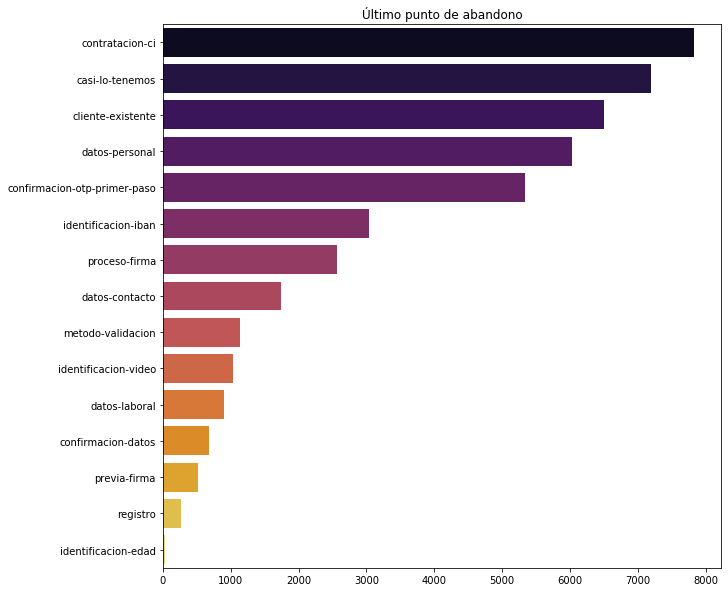

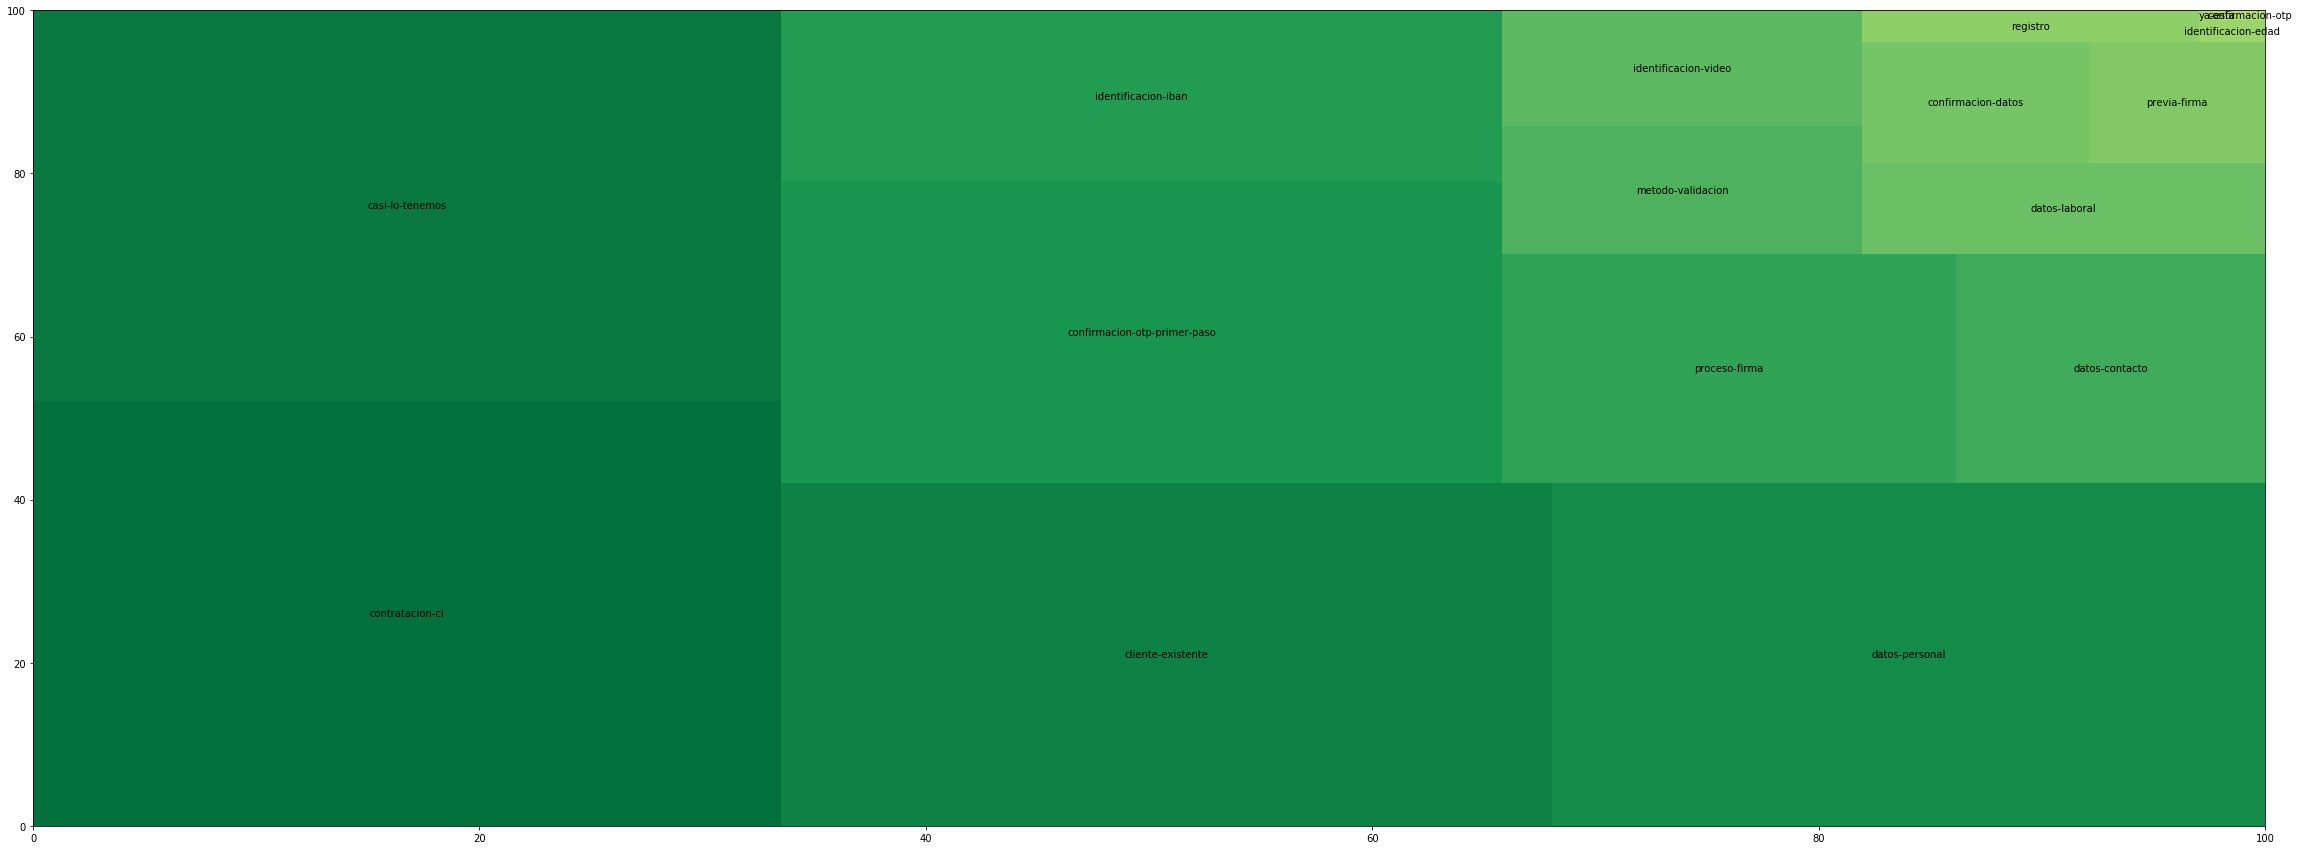

In [23]:
resp_coun=data['Ultimo_punto_abandono'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['Ultimo_punto_abandono'],resp_coun.index,palette='inferno')
plt.title('Último punto de abandono')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()
tree=data['Ultimo_punto_abandono'].value_counts().to_frame()
squarify.plot(sizes=tree['Ultimo_punto_abandono'].values,label=tree.index,color=sns.color_palette('RdYlGn_r',52))
plt.rcParams.update({'font.size':20})
fig=plt.gcf()
fig.set_size_inches(40,15)
plt.show()

In [24]:
plt.style.use('fivethirtyeight')

In [25]:
# selecting some of the interesting and important columns from the set of columns in the given dataset

selected_columns = ['ID_Cliente_EVO', 'Producto', 'Estado', 'F_creacion', 'Numero_caso', 'Fecha_Hora_Apertura', 'Hora_Apertura',
                    'Ultimo_punto_abandono', 'Hora', 'Minuto', 'Horas_por_15', 'Churn']

data_selected = pd.DataFrame(data, columns = selected_columns)
data_selected.columns

Index(['ID_Cliente_EVO', 'Producto', 'Estado', 'F_creacion', 'Numero_caso',
       'Fecha_Hora_Apertura', 'Hora_Apertura', 'Ultimo_punto_abandono', 'Hora',
       'Minuto', 'Horas_por_15', 'Churn'],
      dtype='object')

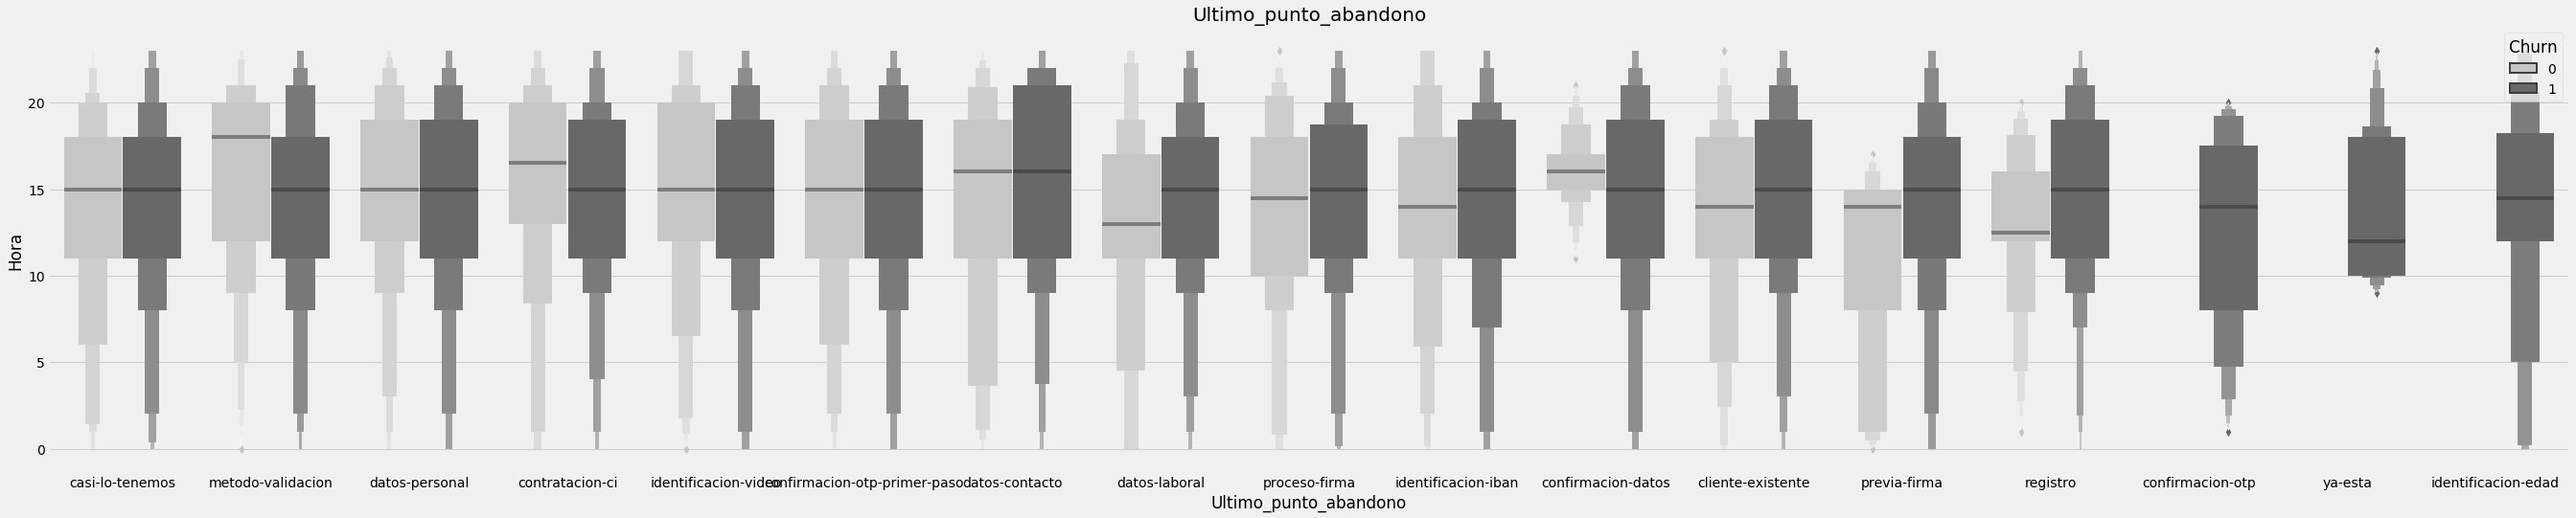

In [26]:
plt.rcParams['figure.figsize'] = (42, 8)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(data['Ultimo_punto_abandono'], data['Hora'], hue = data['Churn'], palette = 'Greys')
plt.title('Ultimo_punto_abandono', fontsize = 20)
plt.show()

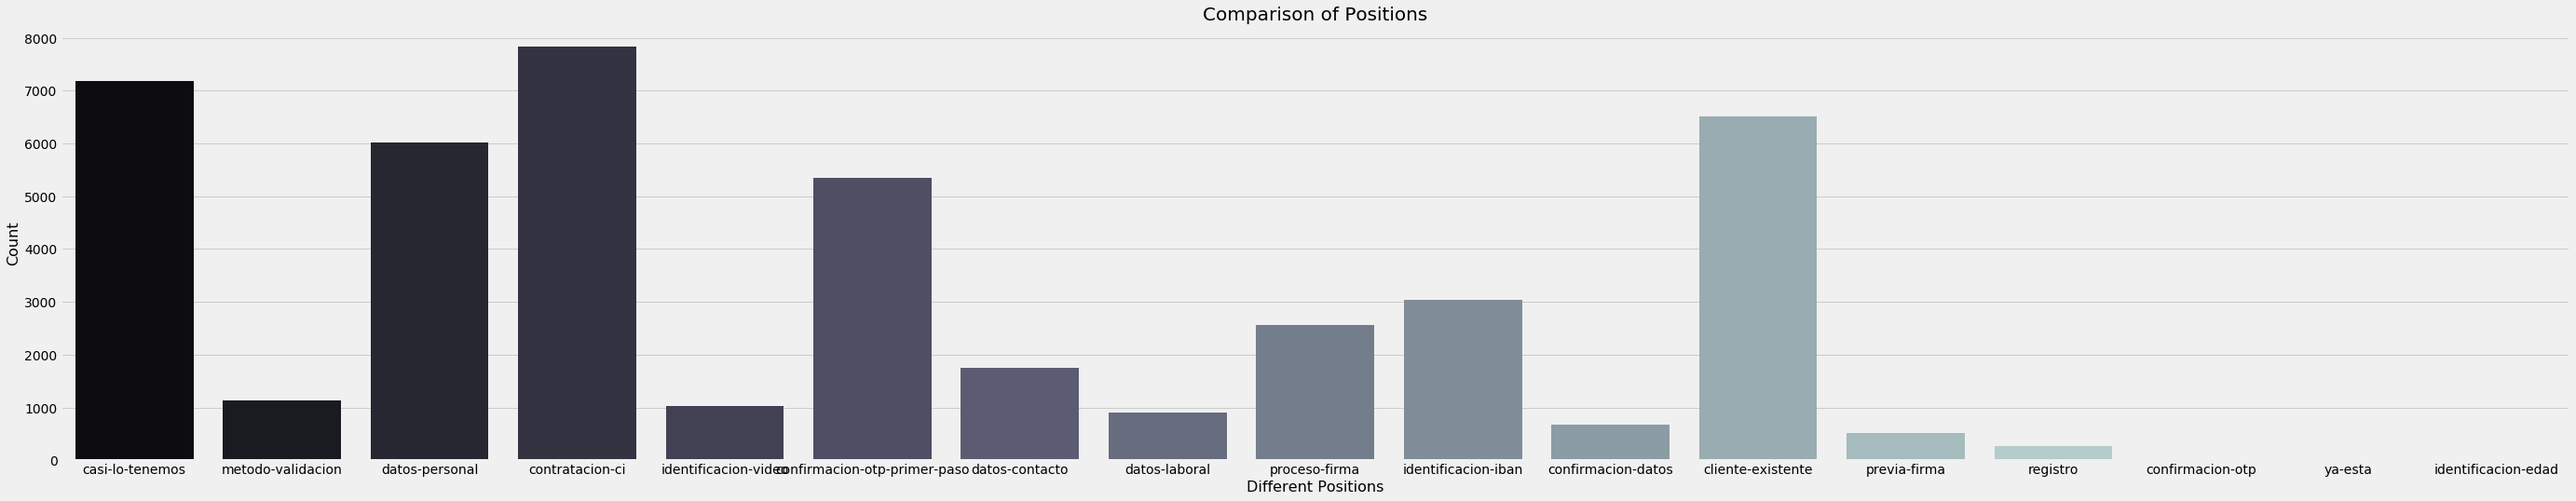

In [27]:
plt.figure(figsize = (43, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Ultimo_punto_abandono', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Comparison of Positions', fontsize = 20)
plt.show()

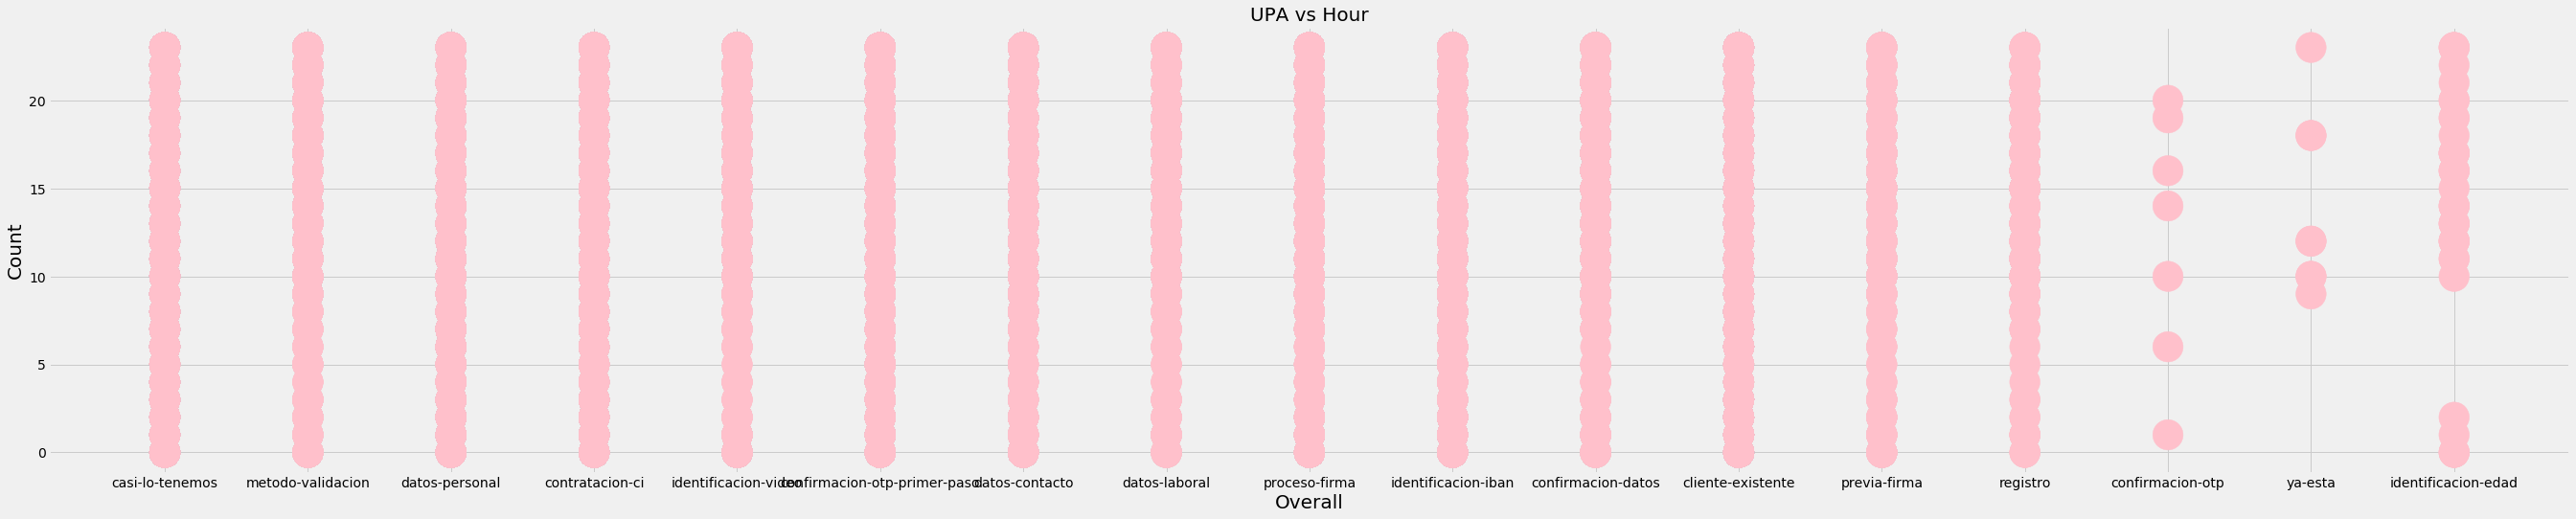

In [28]:
# bubble plot

plt.scatter(data['Ultimo_punto_abandono'], data['Hora'], s = data['Churn']*1000, c = 'pink')
plt.xlabel('Overall', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('UPA vs Hour', fontweight = 20, fontsize = 20)
plt.show()

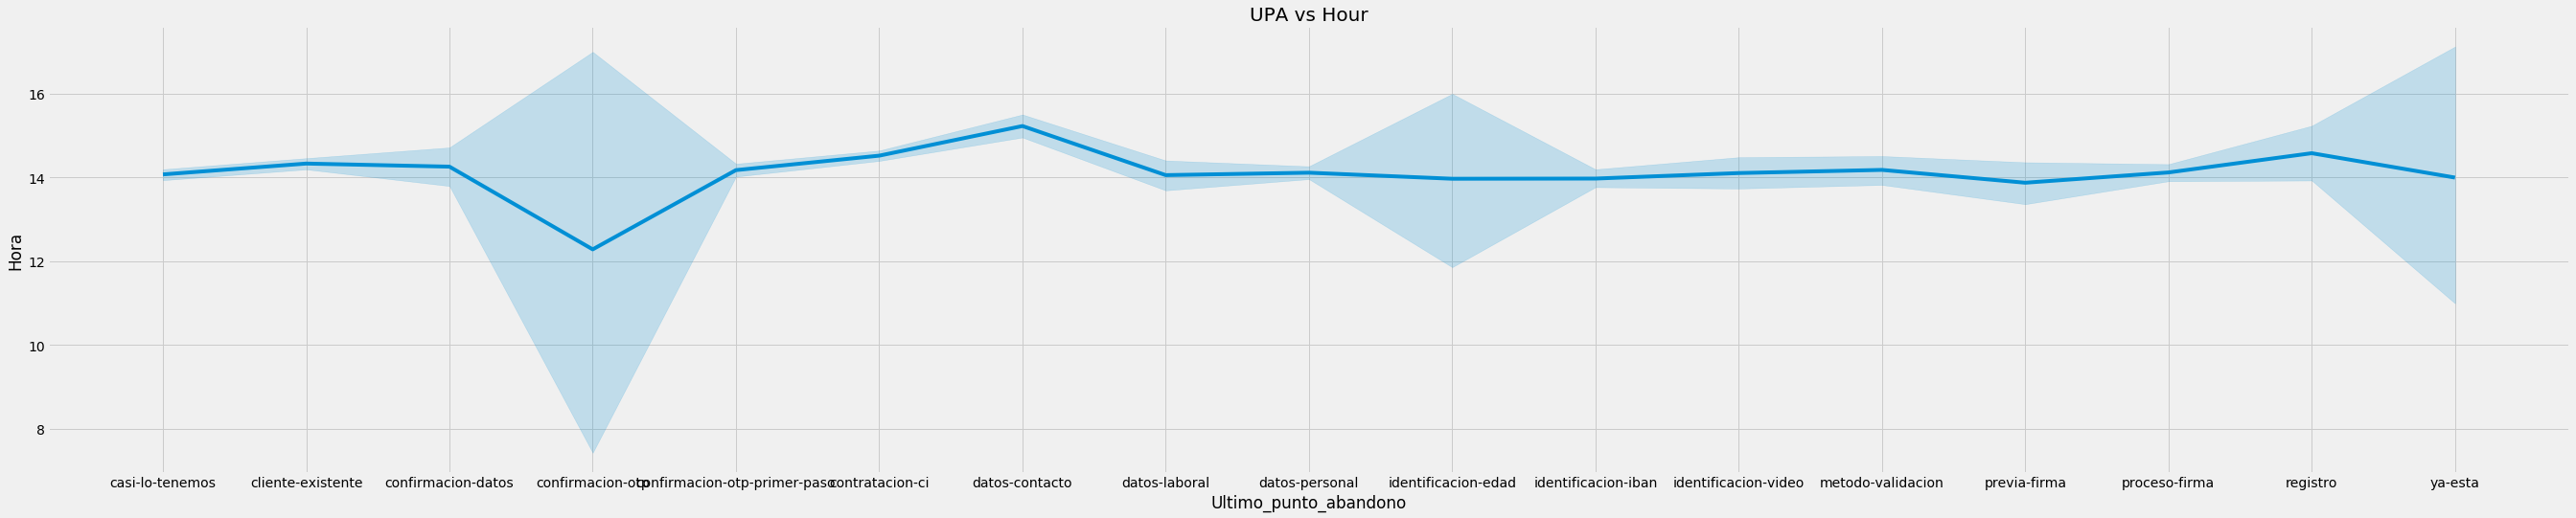

In [29]:
sns.lineplot(data['Ultimo_punto_abandono'], data['Hora'], palette = 'Wistia')
plt.title('UPA vs Hour', fontsize = 20)

plt.show()